<a href="https://colab.research.google.com/github/srajalcodes/DIP-DigitalImageProcessing/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:

# Step 1: Read the input image and resize it
img = cv2.imread("/content/flower.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (200, 200))

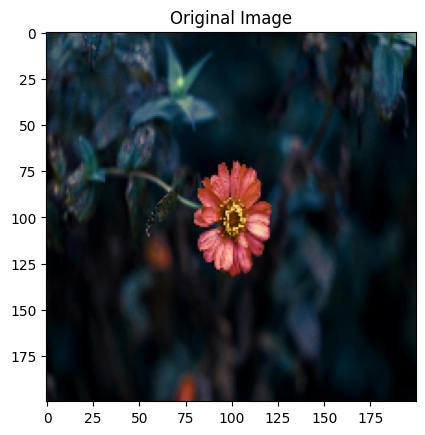

In [ ]:
# Step 2: Display the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

In [ ]:

# Step 3: Create an initial mask and define background and foreground models
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)



In [ ]:
# Step 4: Define a rectangle around the foreground object
rect = (60, 80, 130, 140)  # (x, y, width, height) of the rectangle


In [ ]:

# Step 5: Apply the GrabCut algorithm to segment the image
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 2.97319126e-01,  1.82685043e-01,  4.35088451e-02,
          3.89677722e-01,  8.68092645e-02,  3.04175429e+01,
          2.42605152e+01,  1.23684718e+01,  5.44272675e+01,
          4.40129778e+01,  2.68402738e+01,  6.92850299e+01,
          7.76796407e+01,  8.61514970e+01,  1.43190479e+01,
          9.58795213e+00,  2.32305944e+00,  9.13949580e+01,
          7.32890156e+01,  4.47190876e+01,  9.25009996e+01,
          5.83403124e+01, -2.31464045e+01,  5.83403124e+01,
          4.76463800e+01, -7.72769599e+00, -2.31464045e+01,
         -7.72769599e+00,  5.14706954e+01,  1.22846821e+02,
          6.41664459e+01, -3.67457873e+01,  6.41664459e+01,
          4.88505161e+01, -1.46655233e+00, -3.67457873e+01,
         -1.46655233e+00,  1.34000728e+02,  1.39132475

In [ ]:

# Step 6: Create a binary mask where the background and probable background pixels are set to 0
# and the foreground and probable foreground pixels are set to 1
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")


In [ ]:

# Step 7: Apply the mask to the original image to obtain the segmented foreground object
image_rgb_nob = img * mask2[:, :, np.newaxis]


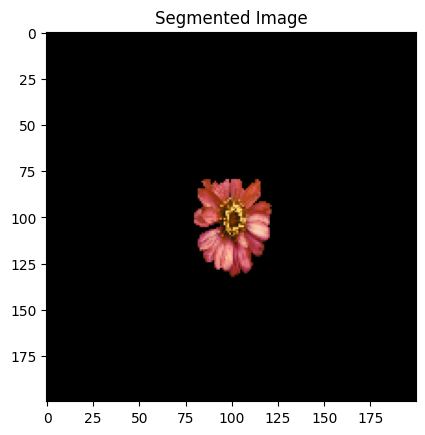

In [ ]:

# Step 8: Display the segmented image
plt.imshow(cv2.cvtColor(image_rgb_nob, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.show()
